In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
VND = VND[['Close']]
VND

,Close
Time,
2017-06-02,3280
2017-06-05,3280
2017-06-06,3320
2017-06-07,3590
2017-06-08,3540
...,...
2023-12-11,21950
2023-12-12,22050
2023-12-13,21600


In [5]:
VND['Target'] = VND.Close.shift(-1)
VND.dropna(inplace = True)
VND.head()

,Close,Target
Time,,
2017-06-02,3280,3280.0
2017-06-05,3280,3320.0
2017-06-06,3320,3590.0
2017-06-07,3590,3540.0
2017-06-08,3540,3560.0


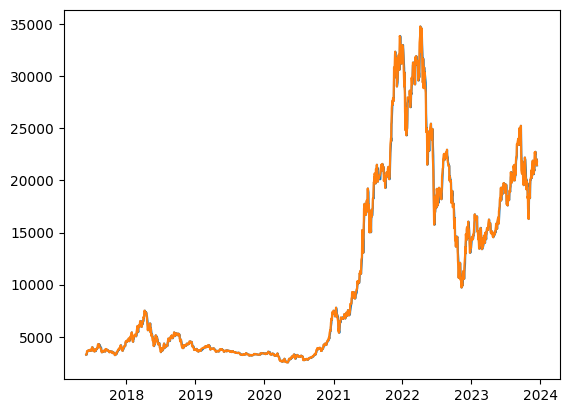

In [6]:
X = VND[['Close']]
y = VND[['Target']]

plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.6 * len(VND))
test_size = len(VND) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)


In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)

RBF MAPE: 66.74884601461847
RBF MAE:  14190.093341309772
RBF Testing RMSE: Target    15419.864006
dtype: float64
RBF MSLE:  1.4450150044472003
Poly MAPE: 112.18397884724305
Poly MAE: 25940.265879620176
Poly Testing RMSE: Target    32698.307901
dtype: float64
Poly MSLE:  0.5826456804086487


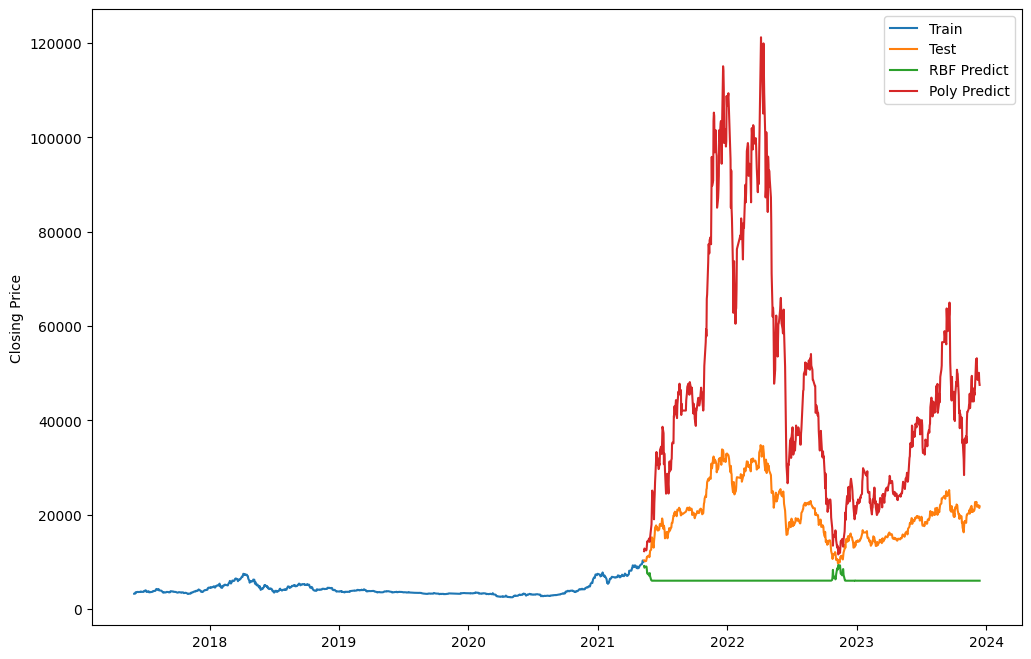

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
# láy giá trị Close của ngày cuối cùng trong dataset
last_row = VND.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[21450]])

In [ ]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([6042.38970788]), array([6030.75527076]), array([6018.415654]), array([6005.34675568]), array([5991.52790215]), array([5976.94286855]), array([5961.58100398]), array([5945.43843699]), array([5928.5193233]), array([5910.83708184]), array([5892.41554919]), array([5873.28996737]), array([5853.50770979]), array([5833.12864582]), array([5812.22505156]), array([5790.88099237]), array([5769.19113555]), array([5747.25899423]), array([5725.19465549]), array([5703.11209748]), array([5681.1262462]), array([5659.34995348]), array([5637.8910885]), array([5616.84992389]), array([5596.31696475]), array([5576.37132243]), array([5557.07967989]), array([5538.49584284]), array([5520.66082545]), array([5503.60338734]), array([5487.34092002]), array([5471.88057645]), array([5457.22054312]), array([5443.35136714]), array([5430.25726814]), array([5417.91738261]), array([5406.30690566]), array([5395.39810952]), array([5385.16123029]), array([5375.56522302]), array([5366.578

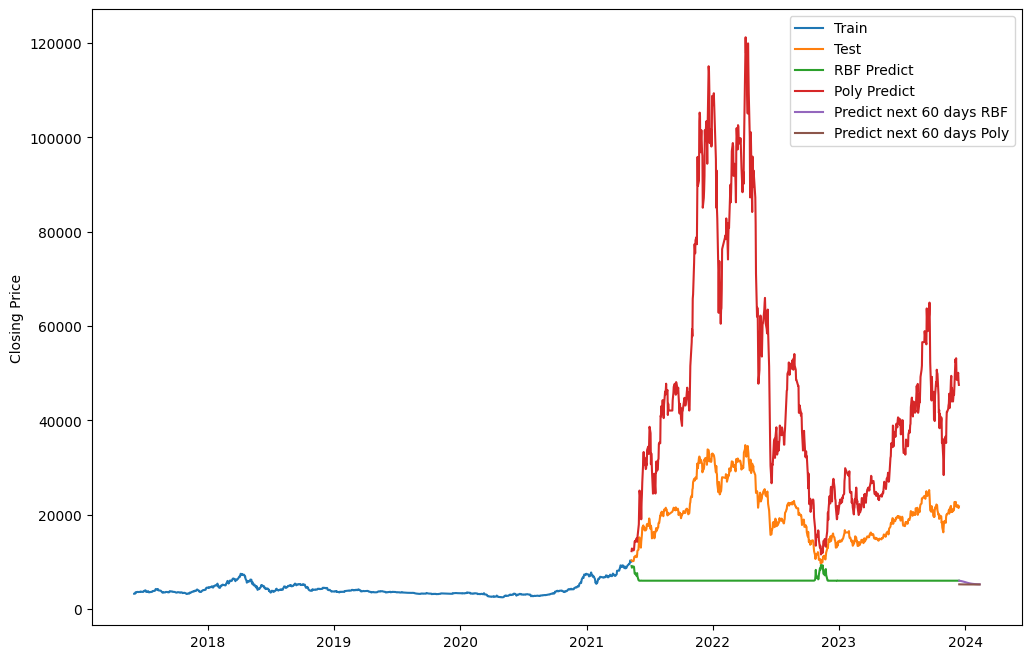

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')

last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days RBF')
plt.plot(next_dates, x_next_60_days_poly, label='Predict next 60 days Poly')

plt.ylabel('Closing Price')
plt.legend()
plt.show()

